<a href="INSERT_colab_R_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSERT_exercise

In [1]:
#| label: exercise

#' @param X the feature input matrix X
#' @param y the outcome vector y
#' @param theta parameter vector for the model (2-dimensional)
		
# Load MASS and data set forbes
library(MASS)
data(forbes)
attach(forbes)

# initialize the data set
X = cbind(rep(1,17),bp)
y = pres

#' function to represent your models via the parameter vector theta = c(theta_1, theta_2)
#' @return a predicted label y_hat for x
f <- function(x, theta){
 
  # >>> do something <<<
  
  return(y_hat)
  
}
		
#' @return a vector consisting of the optimal  parameter vector 
optim_coeff <- function(X,y){
 
  # >>> do something <<<
  
  return(theta)
  
}
 
# >>>  Do something here to check Forbes' conjecture <<<

INSERT_hint

INSERT_solution_header

INSERT_model_equation

In [2]:
#| label: model_equation

#' function to represent your models via the parameter vector theta = c(theta_1, theta_2)
#' @return a predicted label y_hat for x
f <- function(x, theta){
  # Recall that x[1] is always 1 and x[2] is the feature value (bp)
  y_hat <- theta[1] * exp(theta[2]*x[2])
  
  return(y_hat)
}


INSERT_optimal_coefficients

In [3]:
#| label: optim_coeff

#' @return a vector consisting of the optimal parameter vector 
optim_coeff <- function(X,y){
  
  #' @return the empirical risk of a parameter vector theta
  emp_risk <- function(theta){
    sum((log(y) - log(apply(X,1,f,theta)))^2)
  }
 
  return( 
    optim(c(0.4,0.5), 
          emp_risk, 
          method = "L-BFGS-B", 
          lower=c(0,-Inf), 
          upper=c(Inf,Inf))$par)
  # note that c(0.4,0.5) can be replaced by any other theta vector 
  # satisfying the constraint theta[1]>0
}

# optimal coefficients
hat_theta = optim_coeff(X,y)
cat("hat_theta = ", hat_theta)

hat_theta =  0.3805097 0.02059961

INSERT_checking_forbes

INSERT_visually_header

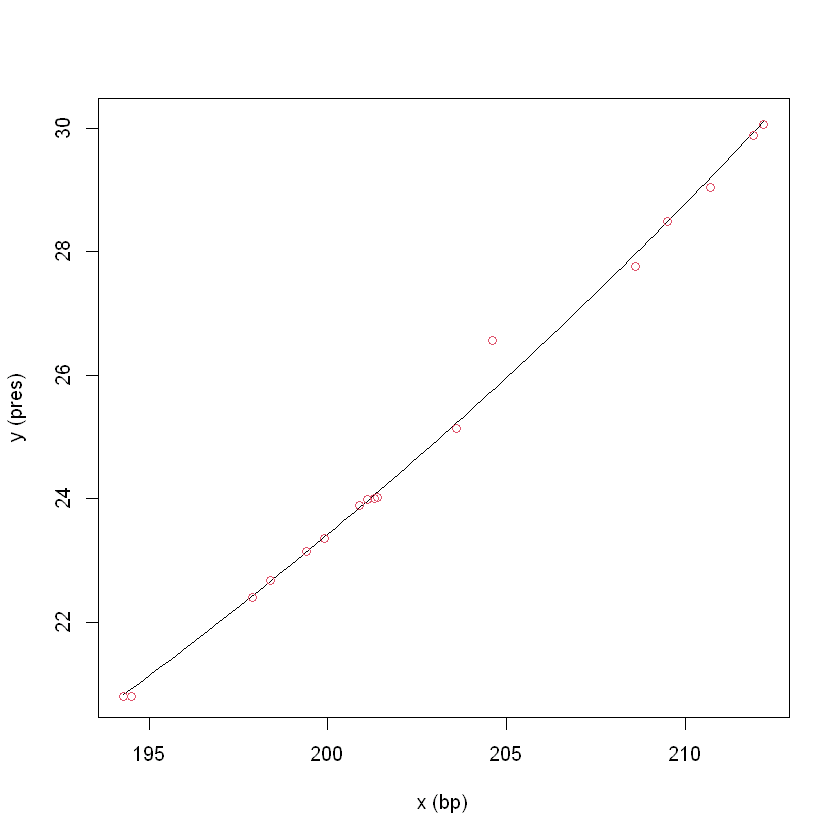

In [4]:
#| label: forbes_visually

f_x <- function(x, theta){
  
  return((theta[1] * exp(theta[2]*x)))
  
}

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
points(pres~bp,col=2)

INSERT_mape_header

In [5]:
#| label: forbes_mape

mape <- function(X,y,theta){
  y_hat = apply(X,1,f,theta)
  perc_error = abs((y - y_hat)/y) * 100
  return(mean(perc_error))
}
cat("Mean Absolute Percentage Error (MAPE):", mape(X,y,hat_theta), "%\n")

Mean Absolute Percentage Error (MAPE): 0.4106409 %


INSERT_alternative_solution

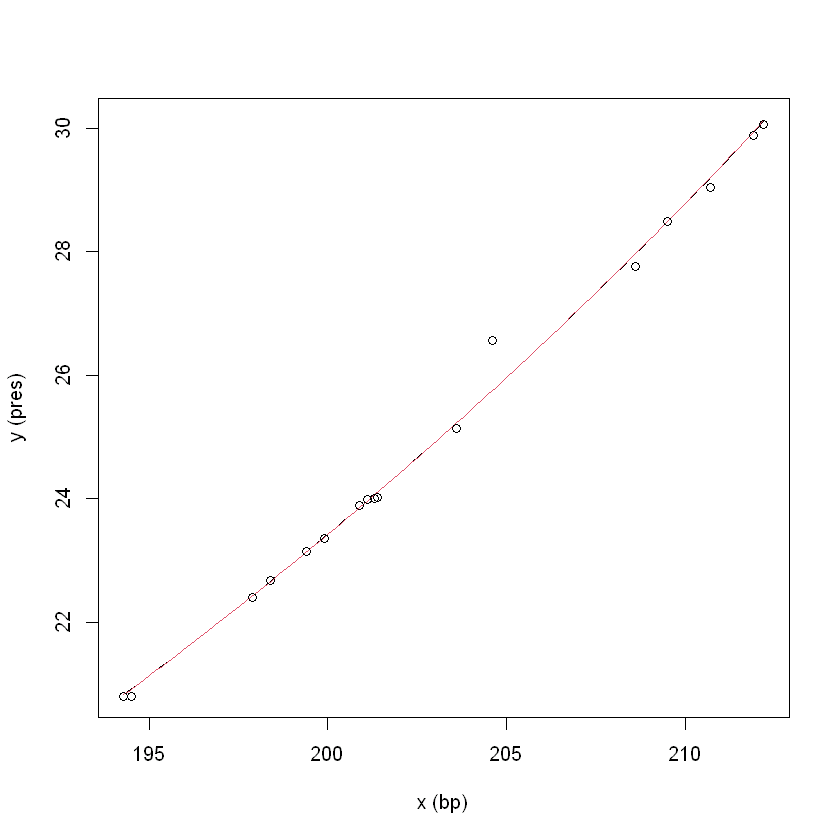

In [6]:
#| label: analytical_solution

hat_theta_2 = cov(bp,log(pres))/(var(bp)) 
hat_theta_1 = exp(mean(log(pres))-hat_theta_2*mean(bp))

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
curve(f_x(x,theta = c(hat_theta_1,hat_theta_2)),min(bp),max(bp),add=T,col=2)
points(pres~bp)

INSERT_full_code_header

The following objects are masked from forbes (pos = 3):

    bp, pres




hat_theta =  0.3805097 0.02059961 


Mean Absolute Percentage Error (MAPE): 0.4106409 %


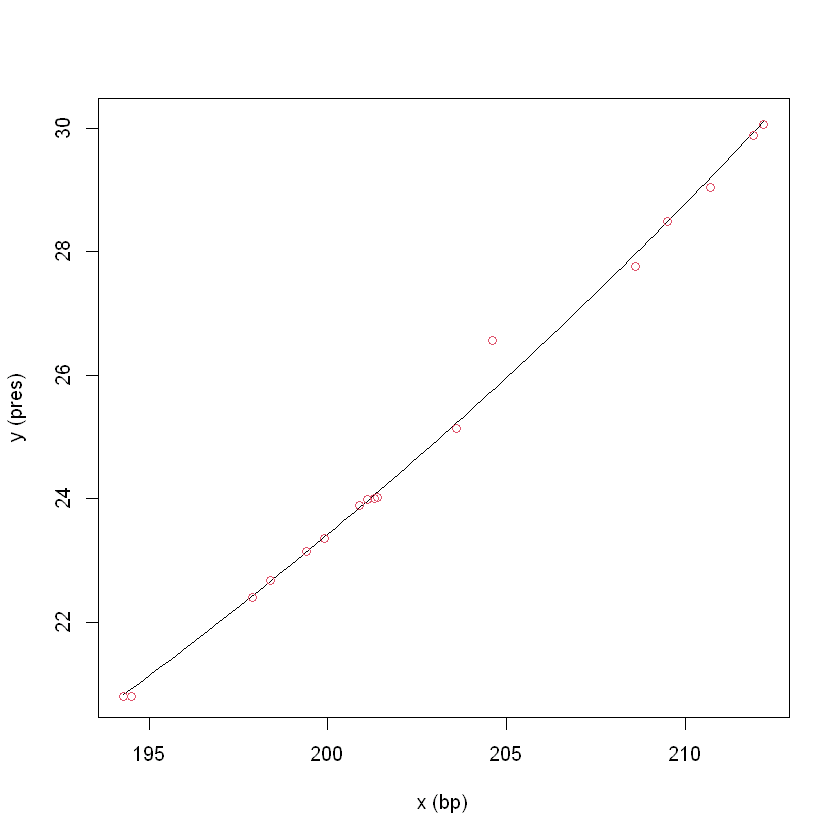

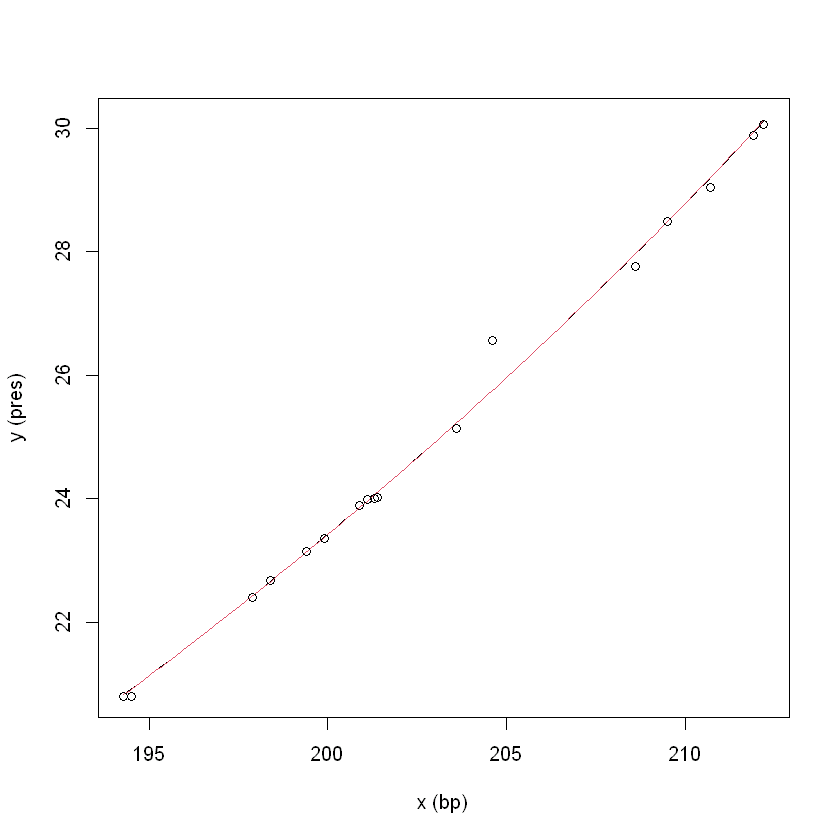

In [7]:
#| label: full_code

#' @param X the feature input matrix X
#' @param y the outcome vector y
#' @param theta parameter vector for the model (2-dimensional)
		
# Load MASS and data set forbes
library(MASS)
data(forbes)
attach(forbes)

# initialize the data set
X = cbind(rep(1,17),bp)
y = pres

# ---------- model_equation -----------------
#' function to represent your models via the parameter vector theta = c(theta_1, theta_2)
#' @return a predicted label y_hat for x
f <- function(x, theta){
  # Recall that x[1] is always 1 and x[2] is the feature value (bp)
  y_hat <- theta[1] * exp(theta[2]*x[2])
  
  return(y_hat)
}

# ------------- optim_coeff -----------------

#' @return a vector consisting of the optimal parameter vector 
optim_coeff <- function(X,y){
  
  #' @return the empirical risk of a parameter vector theta
  emp_risk <- function(theta){
    sum((log(y) - log(apply(X,1,f,theta)))^2)
  }
 
  return( 
    optim(c(0.4,0.5), 
          emp_risk, 
          method = "L-BFGS-B", 
          lower=c(0,-Inf), 
          upper=c(Inf,Inf))$par)
  # note that c(0.4,0.5) can be replaced by any other theta vector 
  # satisfying the constraint theta[1]>0
}

# optimal coefficients
hat_theta = optim_coeff(X,y)
cat("hat_theta = ", hat_theta, "\n")

# ------------ forbes_visually -----------------

f_x <- function(x, theta){
  
  return((theta[1] * exp(theta[2]*x)))
  
}

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
points(pres~bp,col=2)

# ------------ forbes_mape -----------------

avg_perc_error <- function(X,y,theta){
  y_hat = apply(X,1,f,theta)
  perc_error = abs((y - y_hat)/y) * 100
  return(mean(perc_error))
}

cat("Mean Absolute Percentage Error (MAPE):", mape(X,y,hat_theta), "%\n")

# ------------ analytical_solution -----------------
hat_theta_2 = cov(bp,log(pres))/(var(bp)) 
hat_theta_1 = exp(mean(log(pres))-hat_theta_2*mean(bp))

curve(f_x(x,theta = hat_theta),min(bp),max(bp),xlab="x (bp)",ylab="y (pres)")
curve(f_x(x,theta = c(hat_theta_1,hat_theta_2)),min(bp),max(bp),add=T,col=2)
points(pres~bp)